#**Early Stage Lung Cancer Prediction Using Various Machine Learning Techniques** [Document](https://ieeexplore.ieee.org/document/9297576)



**Lung Cancer Database** https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer/data

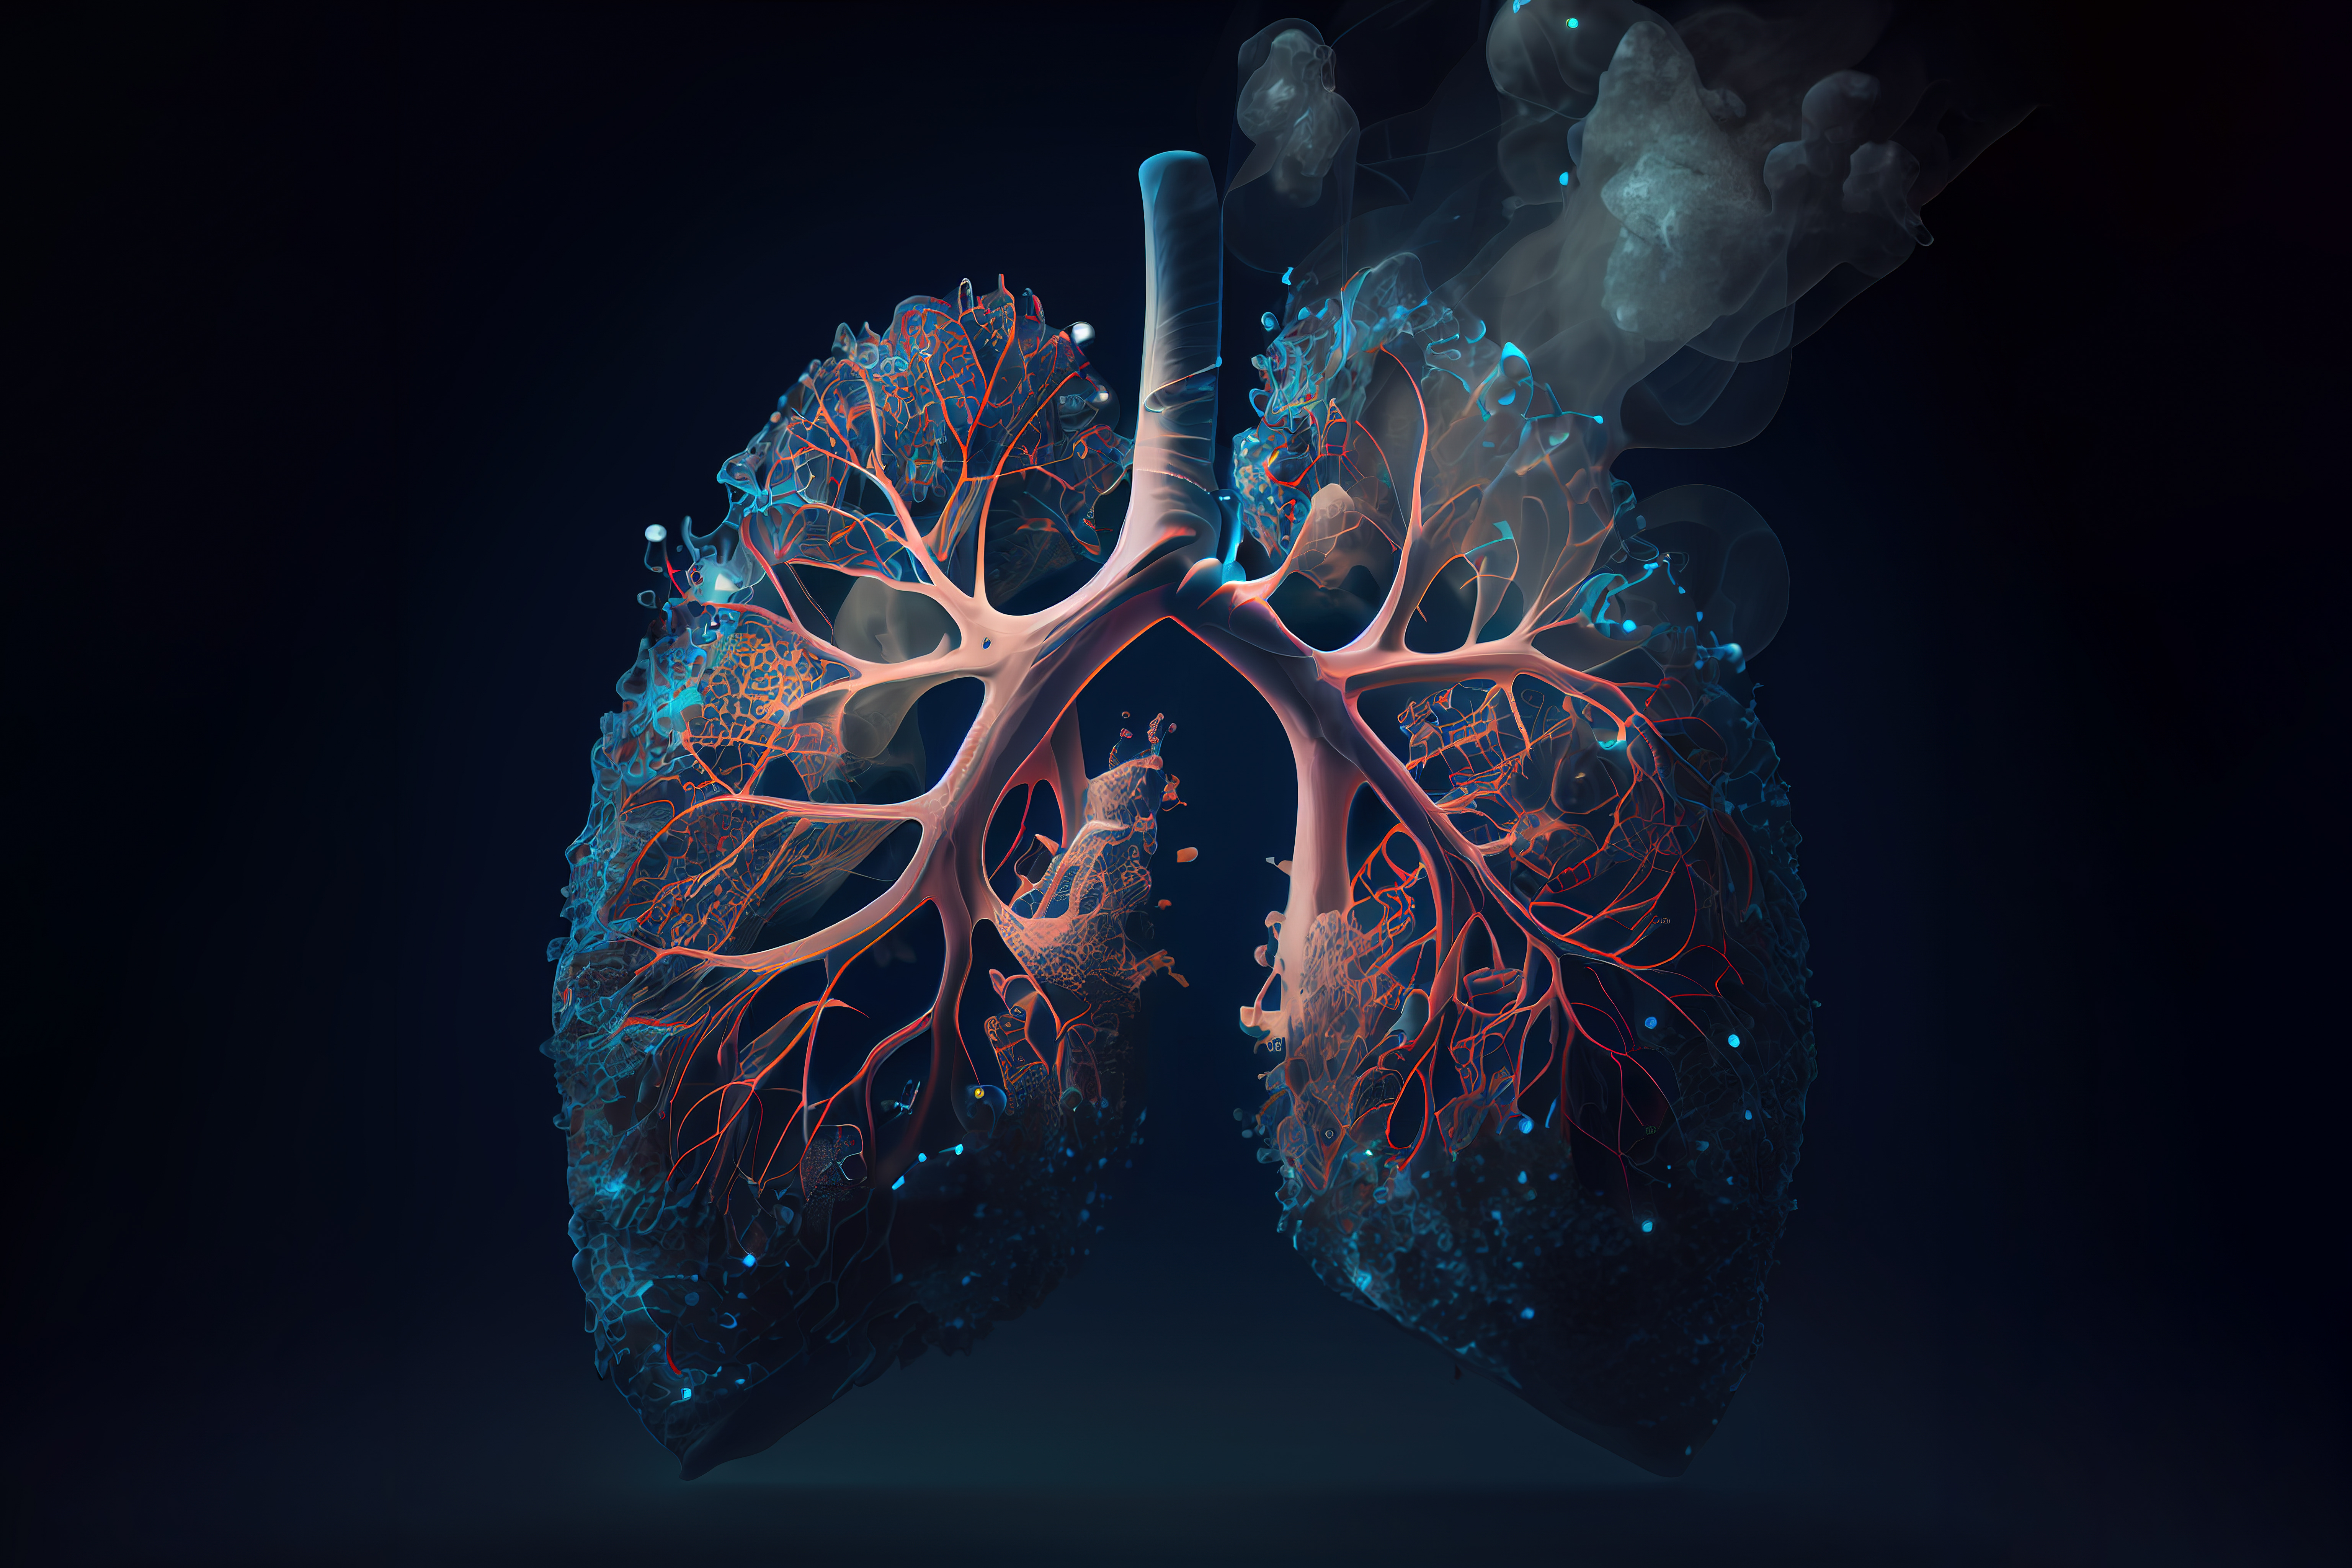

# **Libs & Data Laod**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [20]:
df = pd.read_csv('/content/drive/MyDrive/lung_cancer.csv')

In [21]:
df.head()

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1        2        1         2                  2         2   
1                2        2        2         1                  1         1   
2                1        2        1         2                  1         2   
3                1        1        1         1                  2         1   
4                1        1        1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      2           2         YES  
1                    2                      2           2         YES  
2                    2                      1           2          NO  
3                    1                      2           2          NO  
4                    2                      1           1          NO

# **Data cleaning & preprocessing**

In [22]:
df.shape

(309, 16)

In [23]:
# '1' → 0, '2' → 1 dönüşümünü tüm sütunlarda (LUNG_CANCER hariç)
for col in df.columns:
    if col != 'LUNG_CANCER':
        df[col] = df[col].replace({1: 0, 2: 1})

In [24]:
df.head()

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        0               1        1              0   
1      M   74        1               0        0              0   
2      F   59        0               0        0              1   
3      M   63        1               1        1              0   
4      F   63        0               1        0              0   

   CHRONIC DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                0        1        0         1                  1         1   
1                1        1        1         0                  0         0   
2                0        1        0         1                  0         1   
3                0        0        0         0                  1         0   
4                0        0        0         1                  0         1   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    1                      1           1         YES  
1                    1                      1           1         YES  
2                    1                      0           1          NO  
3                    0                      1           1          NO  
4                    1                      0           0          NO

In [25]:
df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'YES': 1, 'NO': 0}).astype(int) #lung cancer i yes no dan 0 1 e çevirme

<ipython-input-25-201249631>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'YES': 1, 'NO': 0}).astype(int) #lung cancer i yes no dan 0 1 e çevirme


In [26]:
df['GENDER'] = df['GENDER'].replace({'M': 1, 'F': 0}).astype(int)# cinsiyet erkek = 1, female = 0

<ipython-input-26-696450014>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['GENDER'] = df['GENDER'].replace({'M': 1, 'F': 0}).astype(int)# cinsiyet erkek = 1, female = 0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [28]:
df.head()

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       1   69        0               1        1              0   
1       1   74        1               0        0              0   
2       0   59        0               0        0              1   
3       1   63        1               1        1              0   
4       0   63        0               1        0              0   

   CHRONIC DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                0        1        0         1                  1         1   
1                1        1        1         0                  0         0   
2                0        1        0         1                  0         1   
3                0        0        0         0                  1         0   
4                0        0        0         1                  0         1   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
0                    1                      1           1            1  
1                    1                      1           1            1  
2                    1                      0           1            0  
3                    0                      1           1            0  
4                    1                      0           0            0

In [29]:
df.isna().sum() # eksik veri kontrolü

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [30]:
df.duplicated().sum() # tekrarlanmış veri kontrol

np.int64(33)

In [31]:
df.drop_duplicates(inplace=True) #tekrarlanmış verileri sil
df.duplicated().sum()

np.int64(0)

In [32]:
df.head()

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       1   69        0               1        1              0   
1       1   74        1               0        0              0   
2       0   59        0               0        0              1   
3       1   63        1               1        1              0   
4       0   63        0               1        0              0   

   CHRONIC DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                0        1        0         1                  1         1   
1                1        1        1         0                  0         0   
2                0        1        0         1                  0         1   
3                0        0        0         0                  1         0   
4                0        0        0         1                  0         1   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
0                    1                      1           1            1  
1                    1                      1           1            1  
2                    1                      0           1            0  
3                    0                      1           1            0  
4                    1                      0           0            0

In [33]:
df.tail() # yeni son 5

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
279       0   59        0               1        1              1   
280       0   59        1               0        0              0   
281       1   55        1               0        0              0   
282       1   46        0               1        1              0   
283       1   60        0               1        1              0   

     CHRONIC DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
279                0        0        1         1                  0         1   
280                1        1        1         0                  0         0   
281                0        1        1         0                  0         0   
282                0        0        0         0                  0         0   
283                0        1        0         1                  1         1   

     SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
279                    0                      1           0            1  
280                    1                      0           0            0  
281                    1                      0           1            0  
282                    0                      1           1            0  
283                    1                      1           1            1

# **Data Visualization**

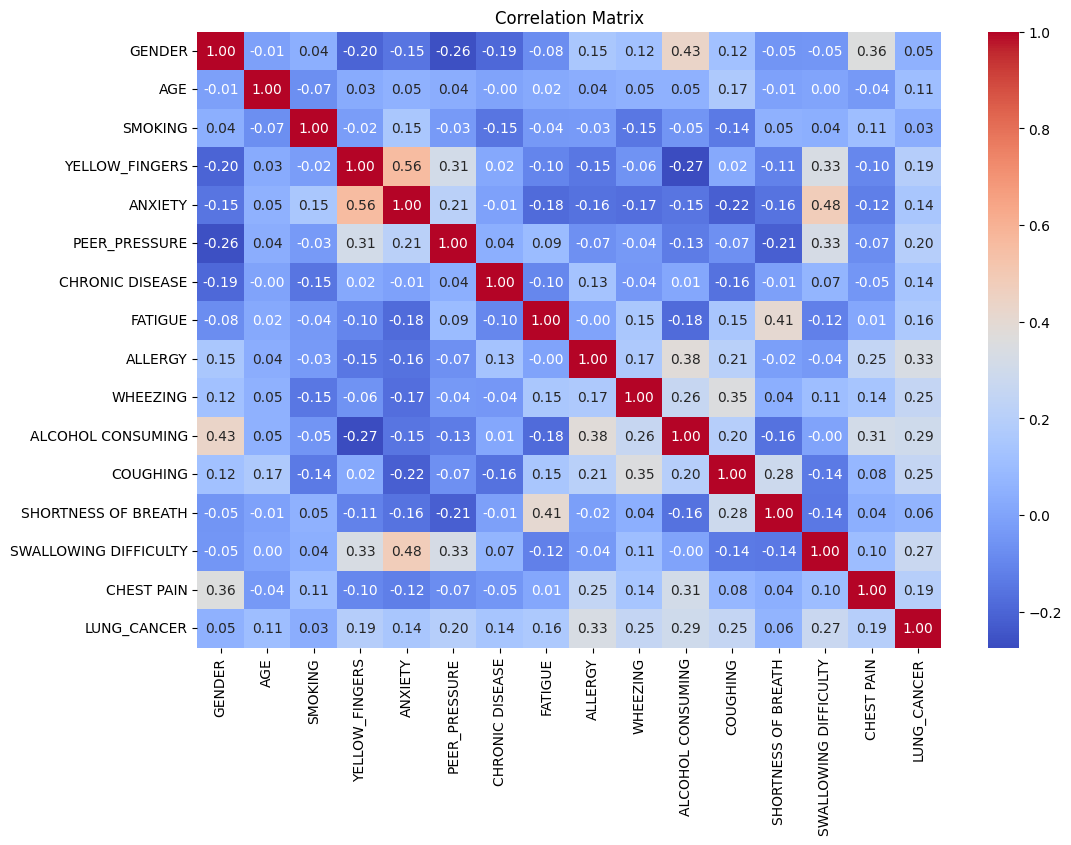

In [34]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f") # fmt=".2f" ile 2 basamaklı gösterim
plt.title("Correlation Matrix")
plt.show()

**En Yüksek İlişkili Özellikler (Features)**


1.   Sarı Parmaklar - Anksiyete **(%56)**
2.   Yutkunma Güçlüğü - Anksiyete **(%48)**
3.   Nefes Darlığı - Yorgunluk **(%43)**
4.   Alkol Tüketimi - Alerji **(%38)**



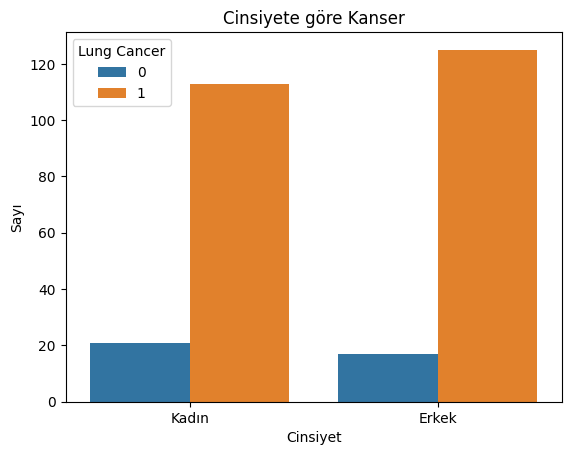

In [35]:
 # Cinsiyete göre Kanser dağılımı

sns.countplot(data=df, x="GENDER", hue="LUNG_CANCER")
plt.xticks([0, 1], ['Kadın', 'Erkek'])
plt.title("Cinsiyete göre Kanser")
plt.xlabel("Cinsiyet")
plt.ylabel("Sayı")
plt.legend(title="Lung Cancer")
plt.show()

Ufak bir farkla erkeklerde akciğer kanseri görülümünün daha fazla olduğu gözüküyor

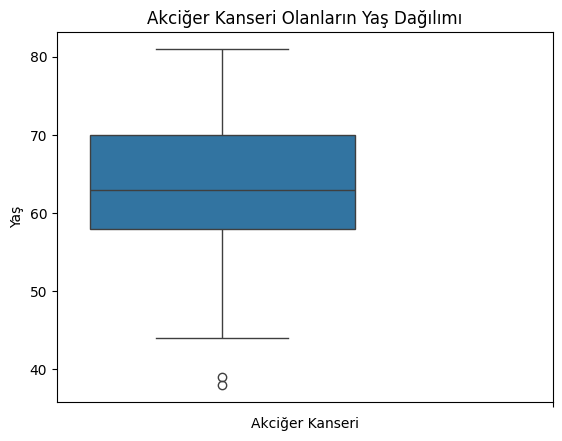

In [36]:
# Yaşa göre kanser dağılımı (Box Plot)

sns.boxplot(data=df[df['LUNG_CANCER'] == 1], x="LUNG_CANCER", y="AGE") #sadece 'lung cancer = 1' olanlar
plt.title("Akciğer Kanseri Olanların Yaş Dağılımı")
plt.xlabel("Akciğer Kanseri")
plt.ylabel("Yaş")
plt.xticks([1])
plt.show()

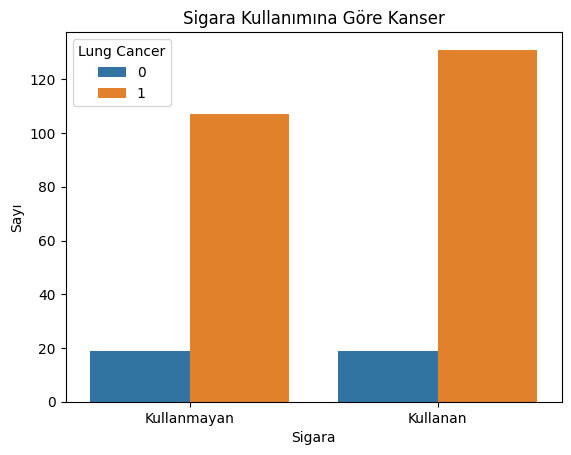

In [37]:
# Sigara kullanımına göre kanser dağılımı

sns.countplot(data=df, x="SMOKING", hue="LUNG_CANCER")
plt.xticks([0, 1], ['Kullanmayan', 'Kullanan'])
plt.title("Sigara Kullanımına Göre Kanser")
plt.xlabel("Sigara")
plt.ylabel("Sayı")
plt.legend(title="Lung Cancer")
plt.show()

# **Machine Learning**

## **Train Test Split**

In [38]:
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

# Eğitim ve test ayırma (test %20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [39]:
# standartlaştırma (-1, 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## **SVM**

In [40]:
#yine svm ama rbf (doğrusal olmayan) modeli deniyoruz

svm_model_rbf = SVC(kernel='rbf')  # doğrusal olmayan model
svm_model_rbf.fit(X_train_scaled, y_train)

# Test verisiyle tahmin
y_pred = svm_model_rbf.predict(X_test_scaled)

# Score
print("SVM (rbf) Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

SVM (rbf) Accuracy: 0.8571428571428571

Confusion Matrix:
 [[ 2  6]
 [ 2 46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.25      0.33         8
           1       0.88      0.96      0.92        48

    accuracy                           0.86        56
   macro avg       0.69      0.60      0.63        56
weighted avg       0.83      0.86      0.84        56



In [41]:
svm_model = SVC(kernel='linear')  # doğrusal model
svm_model.fit(X_train_scaled, y_train)

# Test verisiyle tahmin
y_pred = svm_model.predict(X_test_scaled)

In [42]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

SVM Accuracy: 0.9285714285714286

Confusion Matrix:
 [[ 7  1]
 [ 3 45]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.98      0.94      0.96        48

    accuracy                           0.93        56
   macro avg       0.84      0.91      0.87        56
weighted avg       0.94      0.93      0.93        56



sınıflar doğrusal ayrıldığı için linear, rbf ye göre daha iyi sonuç veriyor dolayısıyla linear ile devam edelim. Ayrıca precision,recall ve f1 değerleri birbirine oldukça yakın ve yüksek olduğundan dengeli ve başarılı olduğunu söylebiliriz.

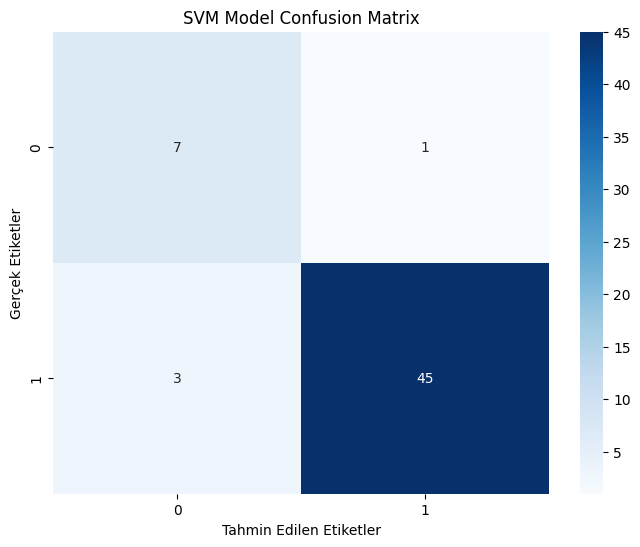

In [43]:
cm = confusion_matrix(y_test, y_pred)

# Sınıf isimlerini (0 ve 1) tanımla
class_names = ['0', '1'] # (pozitif, negatif)

# 2. Karmaşıklık Matrisini Görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("SVM Model Confusion Matrix")
plt.ylabel("Gerçek Etiketler")
plt.xlabel("Tahmin Edilen Etiketler")
plt.show()

SVM model;
* 7 TN
* 45 TP
* 3 FN
* 1 FP

ile 56 veride 4 yanlış ile oldukça başarılı tahmin yapıyor ve

## **KNN**

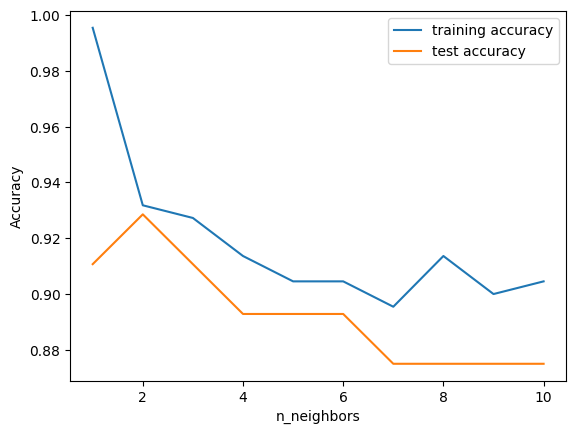

In [44]:
training_accuracy = []
test_accuracy = []
# n_neighbors değerlerini 1 den 10 a dene
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:

    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    # Fit the model
    clf.fit(X_train_scaled, y_train)
    # training accuracy
    training_accuracy.append(clf.score(X_train_scaled, y_train))
    # test accuracy
    test_accuracy.append(clf.score(X_test_scaled, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

En yüksek test doğrulu n_neighbors = 2 de alıyoruz dolayısıyla modeli 2 ile oluşturalım

In [45]:
# KNN model
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train_scaled, y_train)

# Tahmin yap
y_pred_knn = knn_model.predict(X_test_scaled)

In [46]:
# Performans değerlendirmesi
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.9285714285714286

Confusion Matrix:
 [[ 8  0]
 [ 4 44]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         8
           1       1.00      0.92      0.96        48

    accuracy                           0.93        56
   macro avg       0.83      0.96      0.88        56
weighted avg       0.95      0.93      0.93        56



0 sınıfında recall'ın 1 olması ve precision ile arasında fark olması ayrıca 1 sınıfında da precisionun 1 olması belki overfitting göstergesi olabilir. True pozitifleri tamamen yakalıyor.

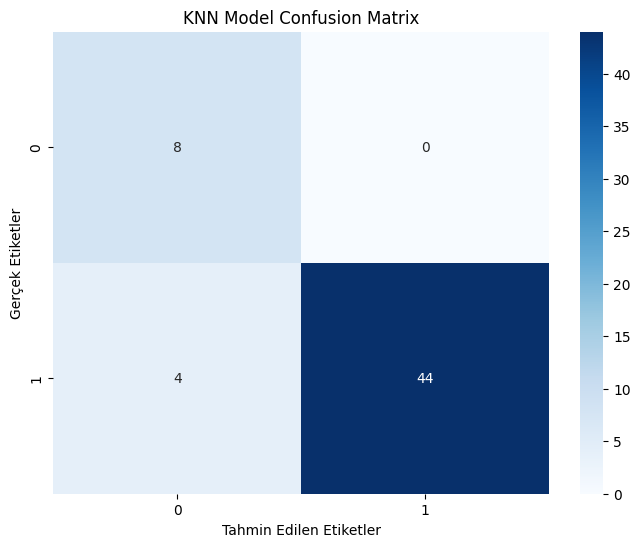

In [47]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

class_names = ['0', '1']

# KNN Confusion Matrisi
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("KNN Model Confusion Matrix")
plt.ylabel("Gerçek Etiketler")
plt.xlabel("Tahmin Edilen Etiketler")
plt.show()

**KNN model;**

* 44 TP
* 8 TN
* 0 FP
* 4 FN

KNN negatif sınıfı çok iyi ayırıyor. Model %93 doğrulukla çalışıyor. Hatalı pozitif tahmini daha önemliyse SVM yerine KNN tercih etmek daha mantıklı gözüküyor. Hatalı negatif tahmin daha kritik ise (örneğin hastayı atlamak) SVM daha kullanışlı.

## **Random Forest**

In [48]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators: ağaç sayısı
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [49]:
y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest
Accuracy: 0.9285714285714286

Confusion Matrix:
 [[ 6  2]
 [ 2 46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.96      0.96      0.96        48

    accuracy                           0.93        56
   macro avg       0.85      0.85      0.85        56
weighted avg       0.93      0.93      0.93        56



Metriklerin bukadar yakın olması dengeli bir performans olduğunu gösterir.


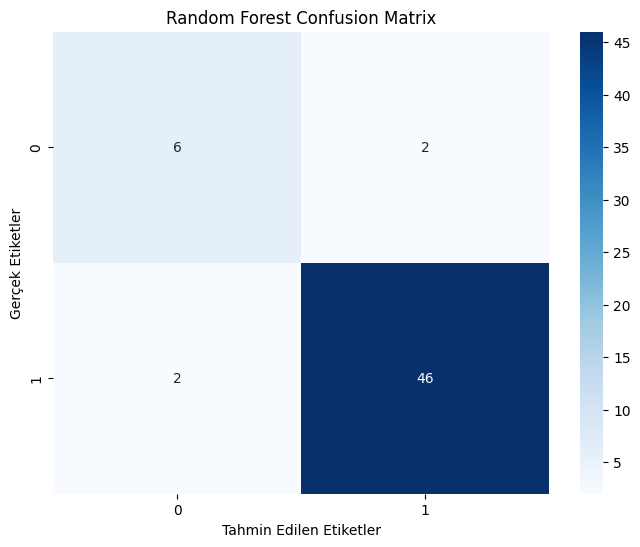

In [50]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

class_names = ['0', '1']

# RF Confusion Matris
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Random Forest Confusion Matrix")
plt.ylabel("Gerçek Etiketler")
plt.xlabel("Tahmin Edilen Etiketler")
plt.show()

**RF model;**

* 46 TP
* 6 TN
* 2 FP
* 2 FN

TP ve TN değerleri oldukça başarılı gözüküyor.

## **Voting Classifier**

In [51]:
svc_clf = SVC(kernel='linear', probability=True, random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=5)
rf_clf  = RandomForestClassifier(n_estimators=100, random_state=42)

In [52]:
voting_clf = VotingClassifier(estimators=[('svm', svc_clf),('knn', knn_clf),('rf', rf_clf)],voting='hard')

In [53]:
voting_clf.fit(X_train_scaled, y_train)
y_pred_voting = voting_clf.predict(X_test_scaled)

In [54]:
print("\n\n=== Voting Classifier (SVM + KNN + RF) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_voting))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_voting))
print("\nClassification Report:\n", classification_report(y_test, y_pred_voting))



=== Voting Classifier (SVM + KNN + RF) ===
Accuracy: 0.9464285714285714

Confusion Matrix:
 [[ 6  2]
 [ 1 47]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.96      0.98      0.97        48

    accuracy                           0.95        56
   macro avg       0.91      0.86      0.88        56
weighted avg       0.94      0.95      0.94        56



accuracy ve diğer metrikler oldukça yüksek ve dengeli, model oldukça iyi öğrenmiş. Özellikle 1 sınıfında tahminler çok tutarlı

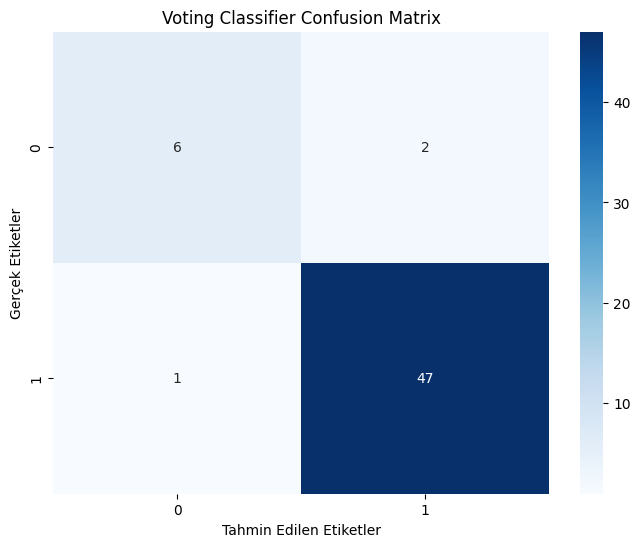

In [55]:
cm_voting = confusion_matrix(y_test, y_pred_voting)

class_names = ['0', '1']

# VC Confusion Matrisi
plt.figure(figsize=(8, 6))
sns.heatmap(cm_voting, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Voting Classifier Confusion Matrix")
plt.ylabel("Gerçek Etiketler")
plt.xlabel("Tahmin Edilen Etiketler")
plt.show()

**VC model;**

* 47 TP
* 6 TN
* 2 FP
* 1 FN

Kanser teşhisinde yanlış negatif en önemli faktör olduğundan '1 FN' ile tercih edilebilecek en iyi model olduğunu düşünüyorum.

# **Results**

## **PERFORMANCE OF DIFFERENT CLASSIFIERS** *(SVM, RF, KNN, CLF)*

### **Experimental Results**

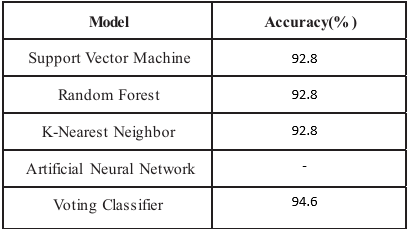

### **Reference Results**

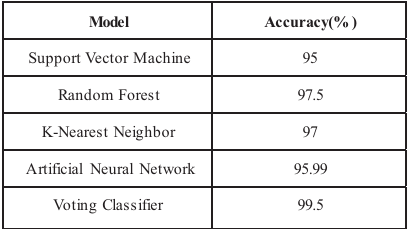

İki sonuçta da en yüksek değer Voting Classifier ile elde edilmiş. Genel olarak dokumandaki sonuçların az farkla önde olmasının sebebi veri tabanındaki features farklılıkları ve verilerin genel farklılıkları olduğunu düşünüyorum.
